In [1]:
from kymatio.numpy import Scattering1D
import matplotlib.pyplot as plt
import numpy as np
from signals import Sinusoid, Chirp
from data_handling.physionet_reader import PhysioNetReader

from recurrence_plots import RecurrencePlot, RecurrencePlotCalculator
from embeddings import LagEmbedding
from embeddings.utils import mutual_information, fnn

In [2]:
def generate_harmonic_signal(T, num_intervals=4, gamma=0.9, random_state=42):
    """
    Generates a harmonic signal, which is made of piecewise constant notes
    (of random fundamental frequency), with half overlap
    """
    rng = np.random.RandomState(random_state)
    num_notes = 2 * (num_intervals - 1) + 1
    support = T // num_intervals
    half_support = support // 2

    base_freq = 0.1 * rng.rand(num_notes) + 0.05
    phase = 2 * np.pi * rng.rand(num_notes)
    window = np.hanning(support)
    x = np.zeros(T, dtype='float32')
    t = np.arange(0, support)
    u = 2 * np.pi * t
    for i in range(num_notes):
        ind_start = i * half_support
        note = np.zeros(support)
        for k in range(1):
            note += (np.power(gamma, k) *
                     np.cos(u * (k + 1) * base_freq[i] + phase[i]))
        x[ind_start:ind_start + support] += note * window

    return x

In [3]:
def RP(signal, show=False):
    lag = mutual_information(signal=signal)
    dim = fnn(signal=signal, lag=lag)
    
    calculator = RecurrencePlotCalculator(metric="cosine", embedding=LagEmbedding(dim=dim, lag=lag))
    rp = calculator.generate(signal=signal)
    rp.normalize()
    if show:
        fig, ax = plt.subplots(1, 2, figsize=(15, 7))
        ax[0].plot(signal)
        ax[1].imshow(rp.get_rp())
        ax[1].set_title(rp.info)
    return rp

In [4]:
s1 = Sinusoid(frequency=1, sec=10, sampling_rate=1000, noise_rate=0.5)

In [5]:
reader = PhysioNetReader(path="../data/single_lead/physionet_challenge/training2017")
ds = reader.get_dataset()

Text(0.5, 1.0, 'Original signal')

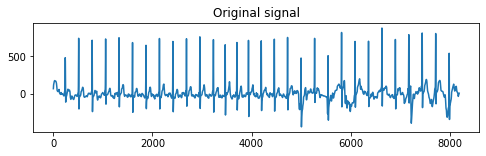

In [6]:
T = 2 ** 13
x = ds[11].x.T.squeeze()[:T]#s1.generate().squeeze()[:T]#generate_harmonic_signal(T)
plt.figure(figsize=(8, 2))
plt.plot(x)
plt.title("Original signal")

Text(0.5, 1.0, 'Time-Frequency spectrogram of signal')

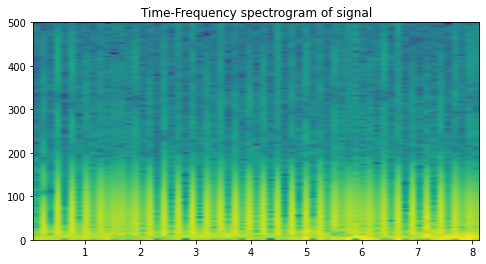

In [7]:
plt.figure(figsize=(8, 4))
plt.specgram(x, Fs=1000)
plt.title("Time-Frequency spectrogram of signal")

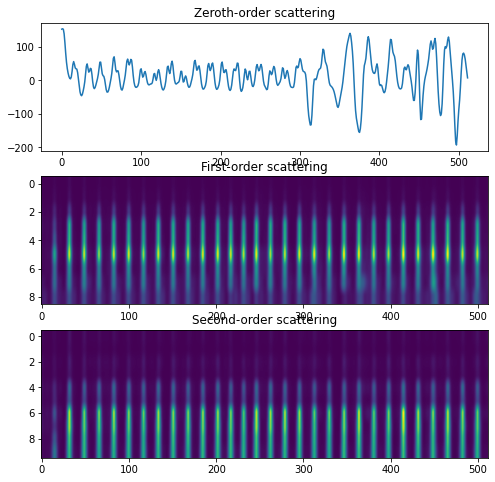

(8192,)
(1, 512)
(9, 512)
(10, 512)


In [9]:
J = 4
Q = 2

scattering = Scattering1D(J, T, Q)

meta = scattering.meta()
order0 = np.where(meta['order'] == 0)
order1 = np.where(meta['order'] == 1)
order2 = np.where(meta['order'] == 2)

Sx = scattering(x)

plt.figure(figsize=(8, 8))
plt.subplot(3, 1, 1)
plt.plot(Sx[order0][0])
plt.title('Zeroth-order scattering')
plt.subplot(3, 1, 2)
plt.imshow(Sx[order1], aspect='auto')
plt.title('First-order scattering')
plt.subplot(3, 1, 3)
plt.imshow(Sx[order2], aspect='auto')
plt.title('Second-order scattering')

plt.show()

print(x.shape)
print(Sx[order0].shape)
print(Sx[order1].shape)
print(Sx[order2].shape)

/Users/carstengieshoff/Library/Caches/pypoetry/virtualenvs/thesis-code-qbsXrjy9-py3.8/lib/python3.8/site-packages/teaspoon/parameter_selection/MI_delay.py:503: RuntimeWarning: divide by zero encountered in log
  I_matrix = Pxy*np.log(Pxy/(Px*Py))
/Users/carstengieshoff/Library/Caches/pypoetry/virtualenvs/thesis-code-qbsXrjy9-py3.8/lib/python3.8/site-packages/teaspoon/parameter_selection/MI_delay.py:503: RuntimeWarning: invalid value encountered in multiply
  I_matrix = Pxy*np.log(Pxy/(Px*Py))
/Users/carstengieshoff/Library/Caches/pypoetry/virtualenvs/thesis-code-qbsXrjy9-py3.8/lib/python3.8/site-packages/teaspoon/parameter_selection/FNN_n.py:72: RuntimeWarning: invalid value encountered in sqrt
  D_mp1 = np.sqrt(
/Users/carstengieshoff/Library/Caches/pypoetry/virtualenvs/thesis-code-qbsXrjy9-py3.8/lib/python3.8/site-packages/teaspoon/parameter_selection/FNN_n.py:76: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(abs(tsrecon[ind_m, -1]-tsrecon[ind, -1]), Dm)-Rtol,

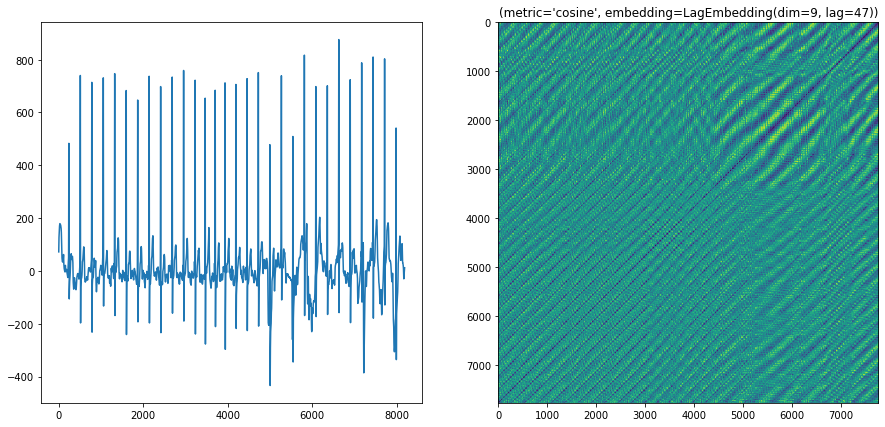

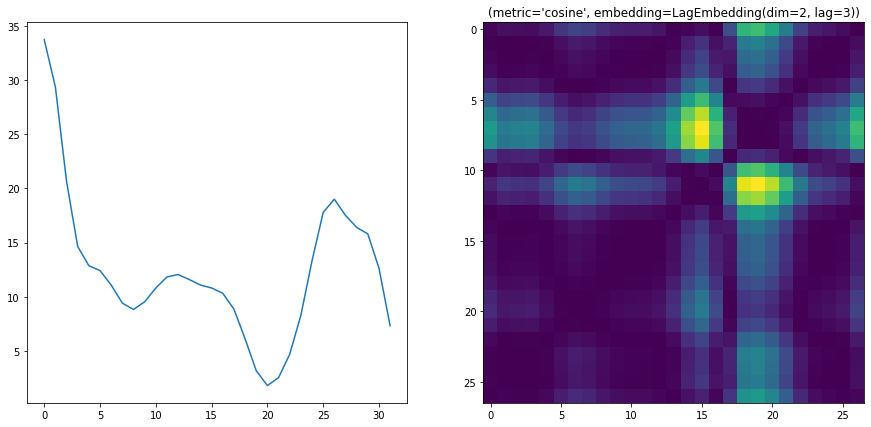

In [22]:
RP(x.reshape(-1,1), show = True)
RP(Sx[order0][0].reshape(-1,1), show = True)

/Users/carstengieshoff/Library/Caches/pypoetry/virtualenvs/thesis-code-qbsXrjy9-py3.8/lib/python3.8/site-packages/teaspoon/parameter_selection/MI_delay.py:503: RuntimeWarning: divide by zero encountered in log
  I_matrix = Pxy*np.log(Pxy/(Px*Py))
/Users/carstengieshoff/Library/Caches/pypoetry/virtualenvs/thesis-code-qbsXrjy9-py3.8/lib/python3.8/site-packages/teaspoon/parameter_selection/MI_delay.py:503: RuntimeWarning: invalid value encountered in multiply
  I_matrix = Pxy*np.log(Pxy/(Px*Py))
/Users/carstengieshoff/Library/Caches/pypoetry/virtualenvs/thesis-code-qbsXrjy9-py3.8/lib/python3.8/site-packages/teaspoon/parameter_selection/MI_delay.py:503: RuntimeWarning: divide by zero encountered in log
  I_matrix = Pxy*np.log(Pxy/(Px*Py))
/Users/carstengieshoff/Library/Caches/pypoetry/virtualenvs/thesis-code-qbsXrjy9-py3.8/lib/python3.8/site-packages/teaspoon/parameter_selection/MI_delay.py:503: RuntimeWarning: invalid value encountered in multiply
  I_matrix = Pxy*np.log(Pxy/(Px*Py))
/Use

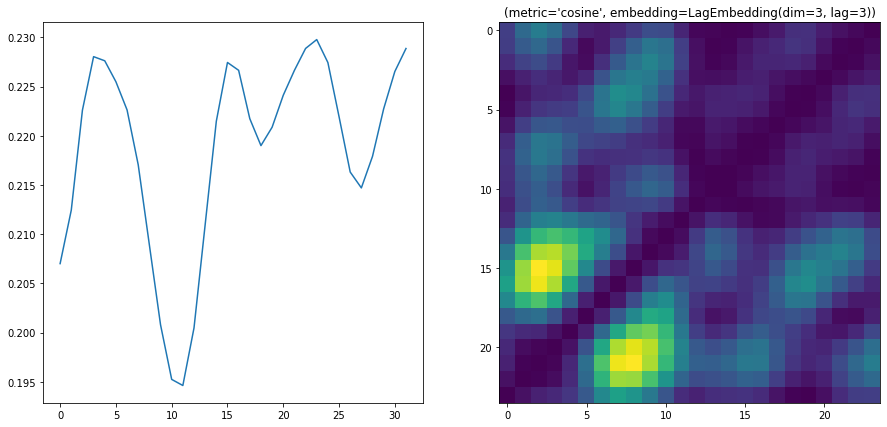

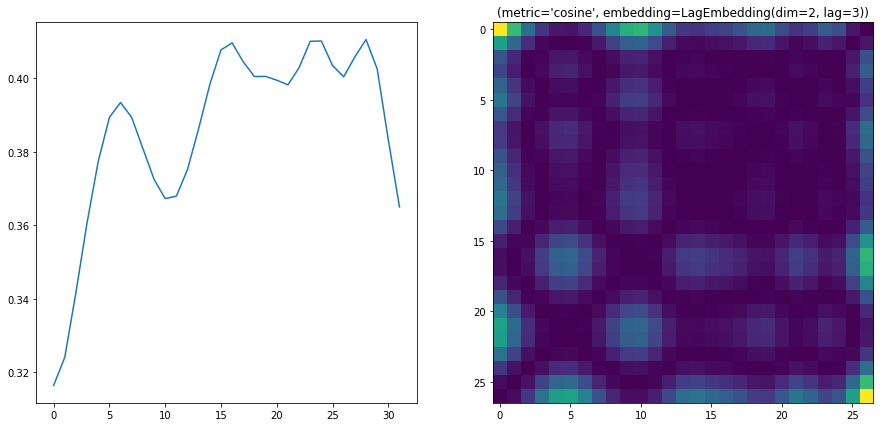

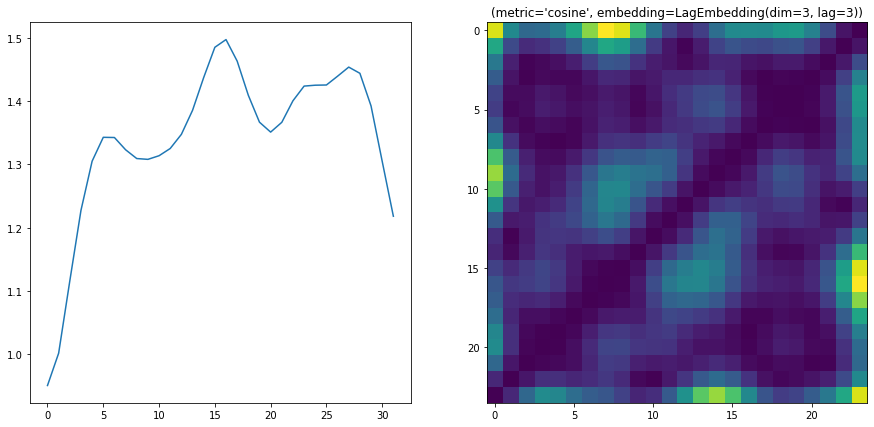

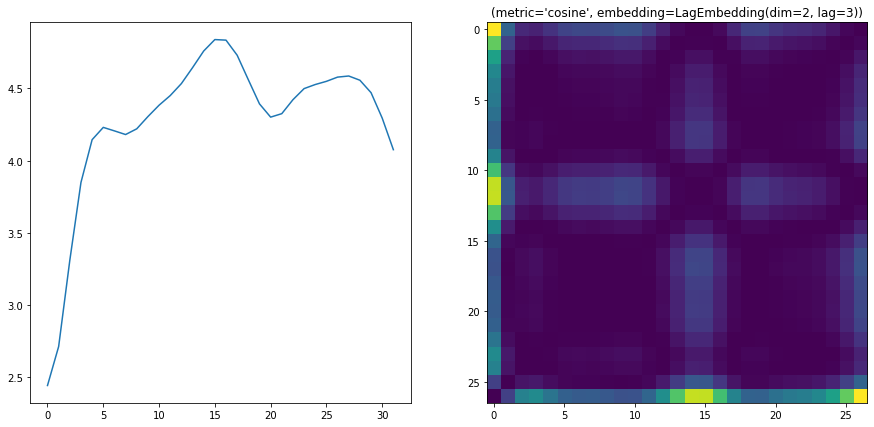

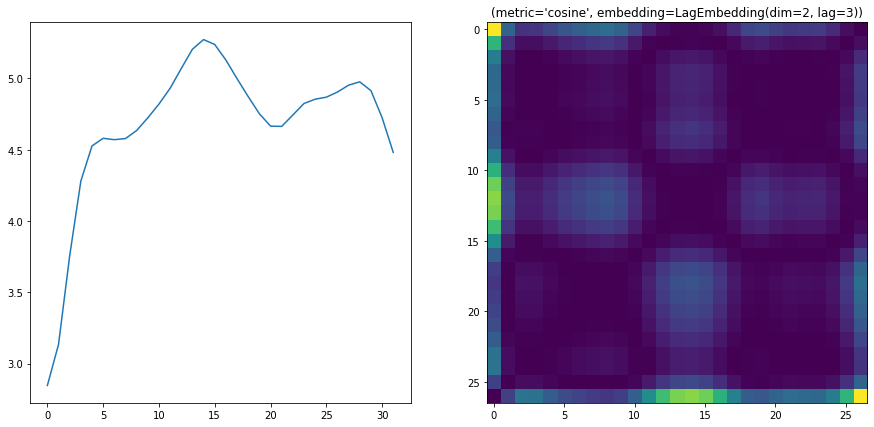

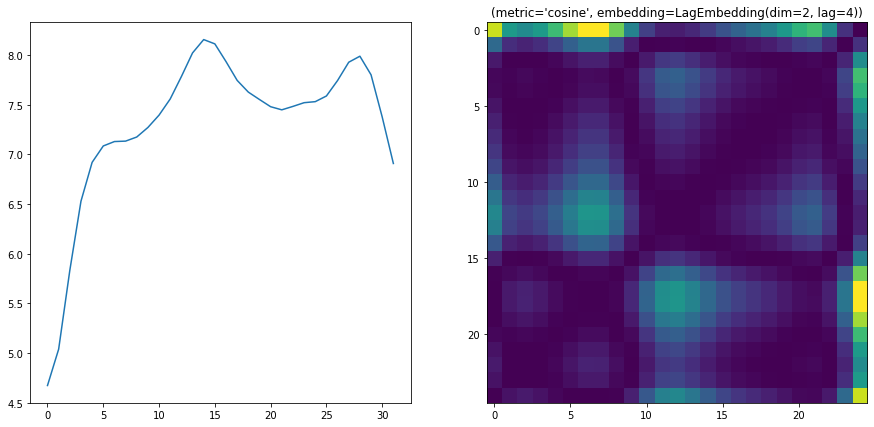

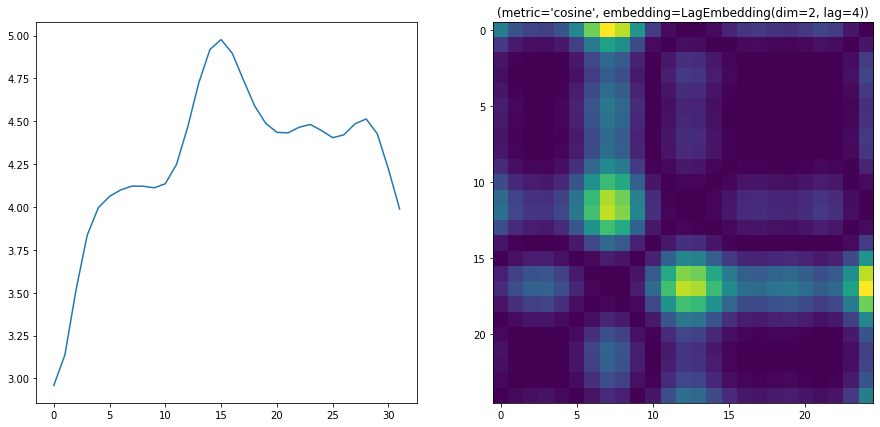

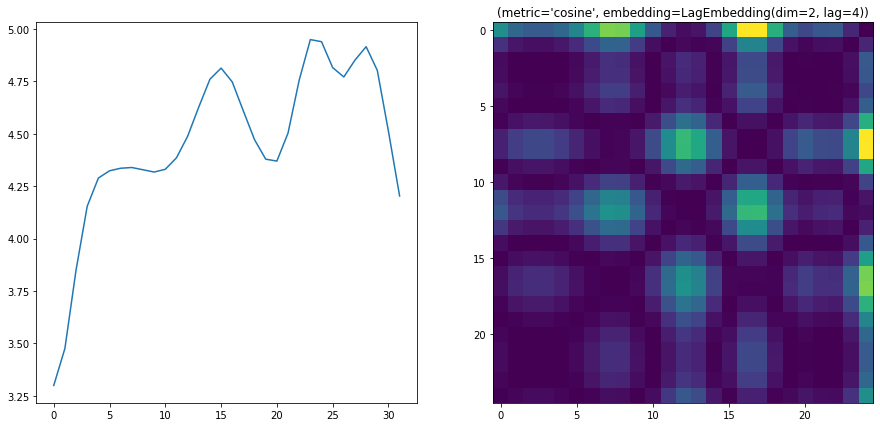

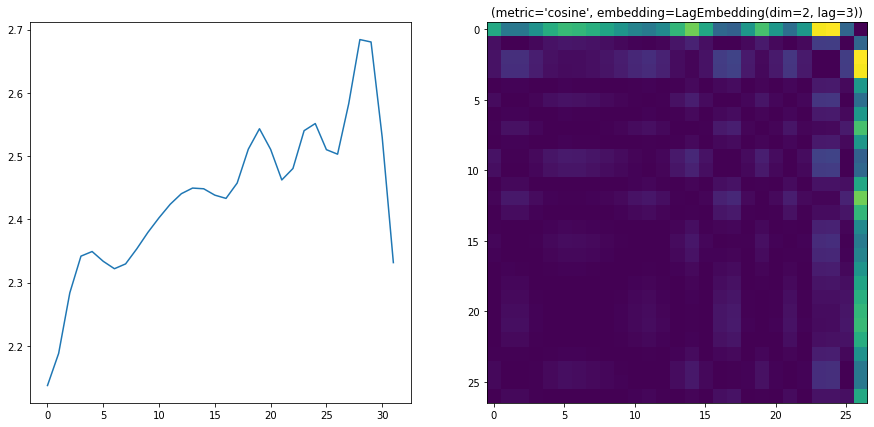

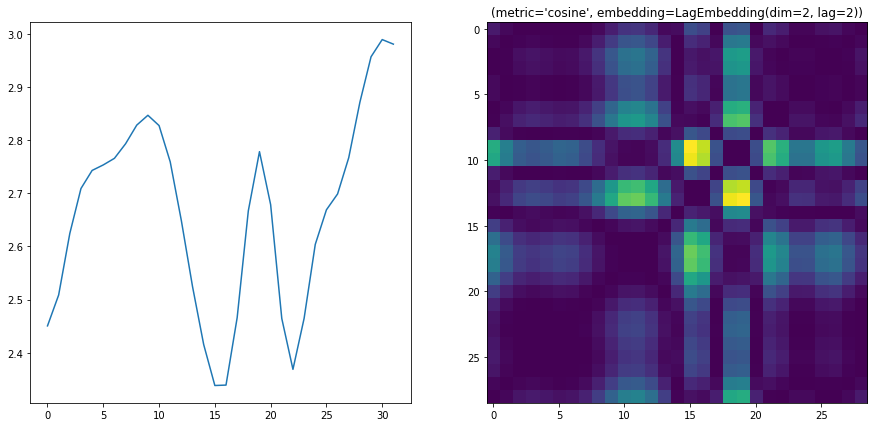

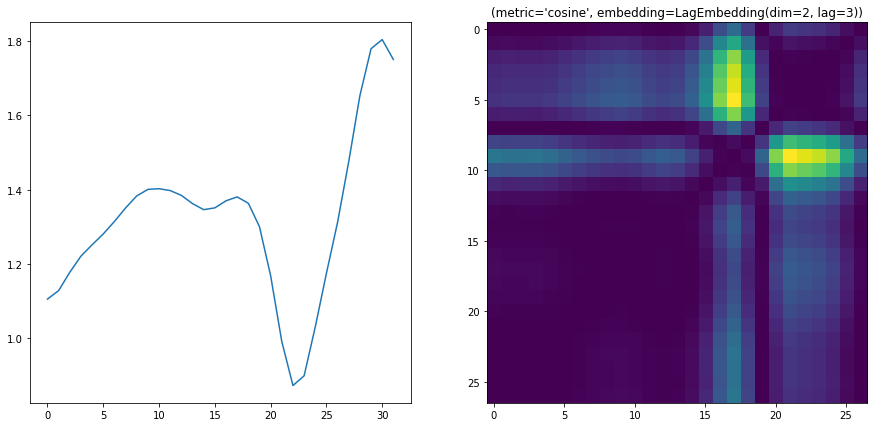

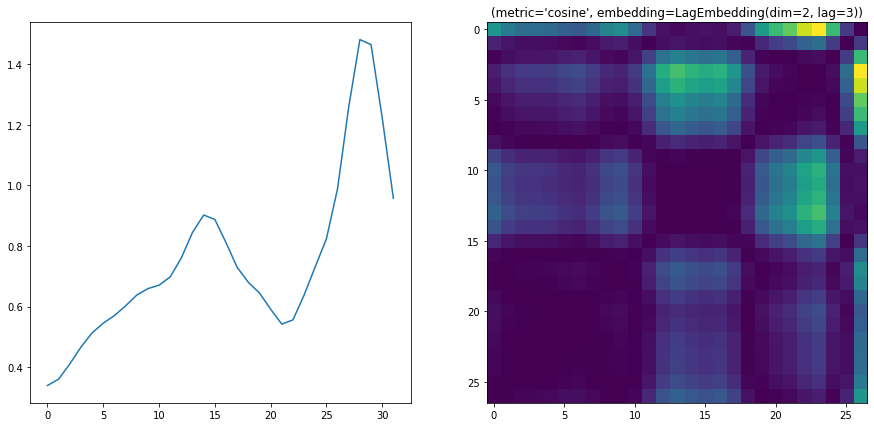

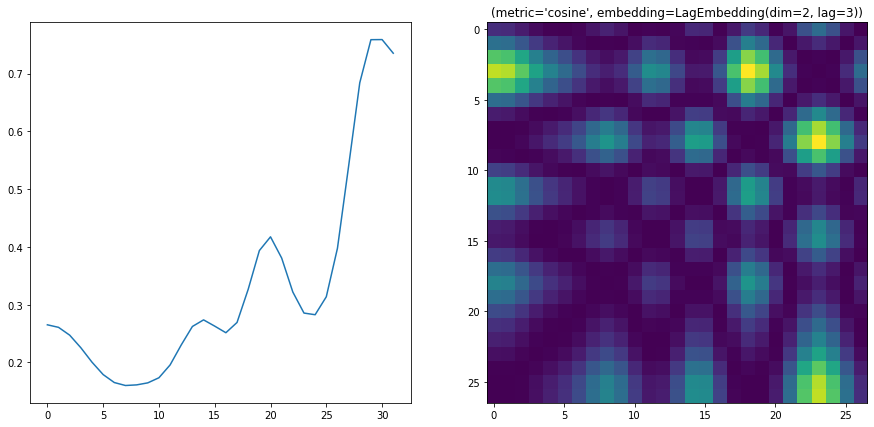

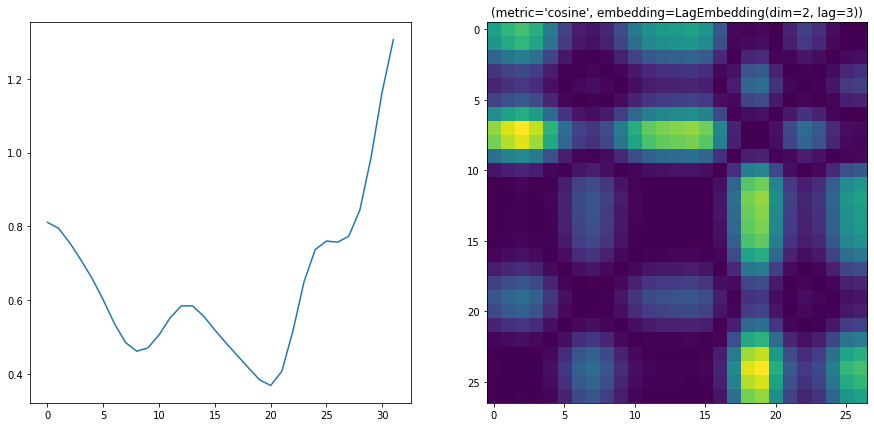

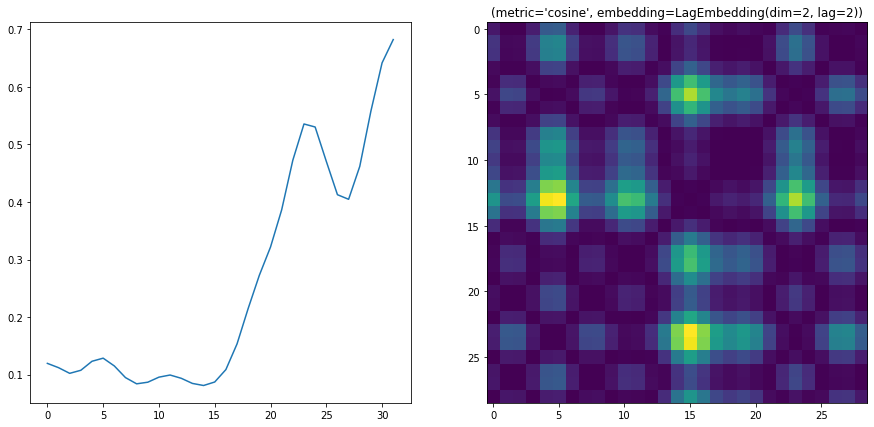

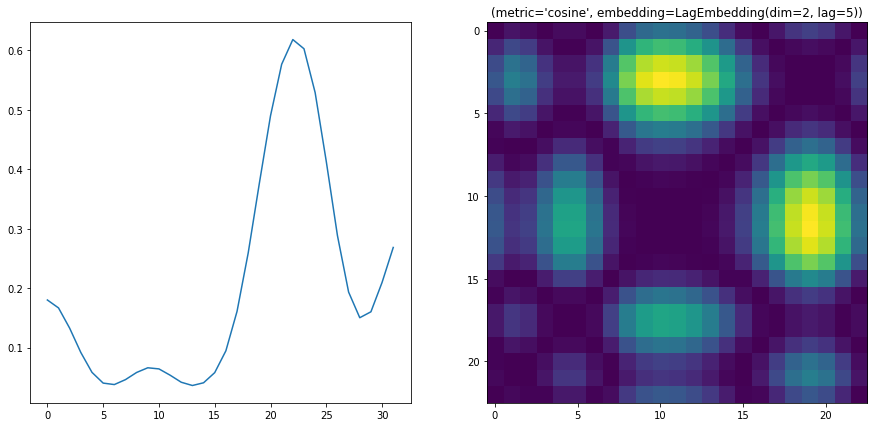

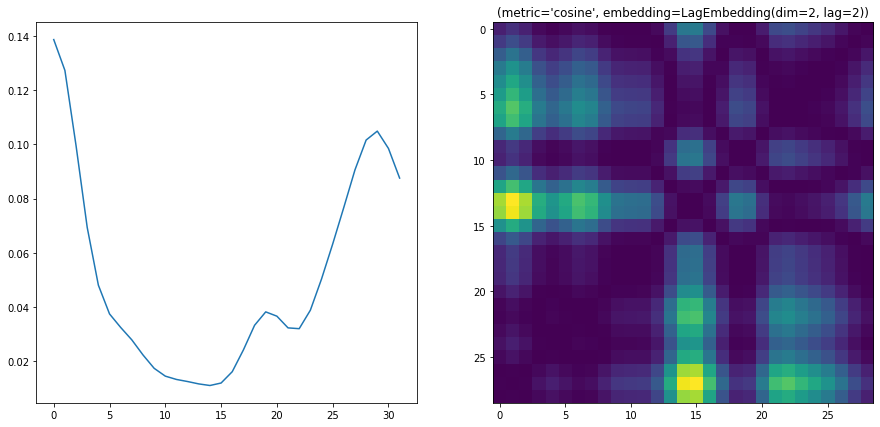

In [23]:
for i in range(Sx[order1].shape[0]):
    # Sx[order0][0]
    s = (Sx[order1][i,:]/1).reshape(-1, 1)
    RP(s, show=True)

In [20]:
s = (Sx[order1][0,:]/Sx[order0][0]).reshape(-1, 1)
s.shape

(512, 1)